### 神经网络是由【多个神经元】组成的，而每个神经元由三个关键知识点组成：1、激活函数；2、损失函数；3、梯度下降。

# 1、激活函数

## 1.1 激活函数

## 1.2 激活函数的主要作用

### 激活函数的主要作用是：在模型中加入非线性因素，以解决线性模型表达能力不足的缺点。因为神经网络的数学基础是处处可微的，所以选取的激活函数需要满足可微的条件。

## 1.3 常用的激活函数及其特点

### 在神经网络里常用的激活函数有 Sigmoid, Tanh, Relu, 及一些 Relu 的变体

### 1.3.1 Sigmoid 函数

##### Sigmoid 函数是常见的激活函数，其数学形式为： $$f(x) = \frac{1}{1+e^{-x}}$$ 其图像如下图所示，其中，x可取任意实数，但是对应的y却只能有0~1的范围。所以，经过Sigmoid函数的值都会落在0~1区间里，即：Sigmoid函数能够把输入的值‘压缩’到0~1之间，在TensorFlow中，对应的函数为：tf.nn.sigmoid(x,name=None)

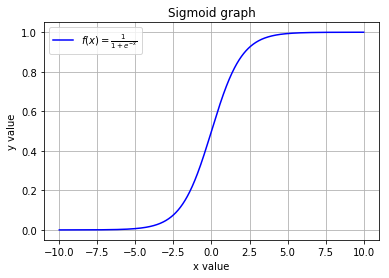

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# x = np.random.random(100)
x = np.linspace(-10,10,800)
y = 1/(1+np.exp(-x))

plt.plot(x,y,'b-',label=r'$f(x) = \frac{1}{1+e^{-x}}$')
plt.grid(True)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Sigmoid graph')
plt.legend()
plt.show()

#### 从图像上看，随着x趋近正负无穷大，y对应的值越来越接近1或-1，这种情况叫做饱和。处于饱和态的激活函数意味着：当x=100和x=1000时的反应都是一样的，这样的特性相当于将1000等于100的十倍的信息丢失了，故：为了有效使用Sigmoid函数，需要尽量将输入x尽量控制在-6~之间，当然，-3~3会更好些

### 1.3.2 Tanh函数

#### tanh函数可以说是Sigmoid函数的值域升级版，由Sigmoid的0~1升级到了-1~1，但是Tanh函数也不能完全替代Sigmpod函数，在某些输出需要大于0的情况下，还是要使用Sigmoid函数

#### Tanh函数也是常用的非线性函数，其数学形式为：$$f(x)=2*sigmoid(2x)-1=2*\frac{1}{1+e^{-2x}}-1$$其函数曲线图如下，其中：x的取值也是从负无穷到正无穷，对应的y值变为-1~1之间，有更广的值域，在TensorFlow中对应的函数为：tf.nn.tanh(x,name=None)，显而易见，tanh也具有饱和态的问题

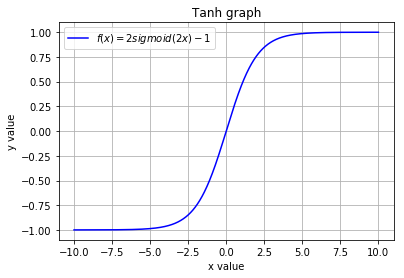

In [54]:
x = np.linspace(-10,10,800)
y = 2/(1+np.exp(-x))-1

plt.plot(x,y,'b-',label=r'$f(x) =2sigmoid(2x)-1$')
plt.grid(True)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Tanh graph')
plt.legend()
plt.show()

### 1.3.3 Relu函数

#### 除了上面介绍的Sigmoid函数和Tanh函数外，还有一个更为常用的激活函数——Relu函数，其数学形式为：$$f(x)=max(0,x)$$其图像如下。该式子把大于0留下，其余的均舍弃（设为0）——它对正向信号比较重视，忽略负向信号。在TensorFlow中对应的函数为：tf.nn.relu(features,name=None)——一般的Relu函数，即max(features,0)或tf.nn.relu6(features,name=None)——以6为阈值的Relu函数，即max(features,6)【可防止梯度爆炸】

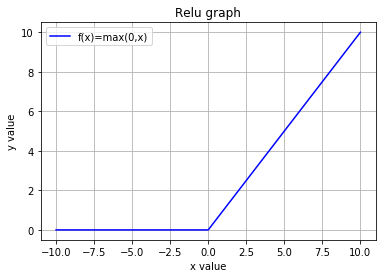

In [67]:
x = np.linspace(-10,10,800)
y = [max(0,i) for i in x]

plt.plot(x,y,'b-',label=r'f(x)=max(0,x)')
plt.grid(True)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Relu graph')
plt.legend()
plt.show()

#### 与Relu函数类似的还有Softplus函数，其数学形式为：$$f(x)=ln(1+e^x)$$其图像如下。Softplus与Relu函数的区别：Softplus函数更加平滑，但是计算量很大，且对小于0的值保留的相对多一点。在TensorFlow中对应的函数为：tf.nn.softplus(features,name=None)

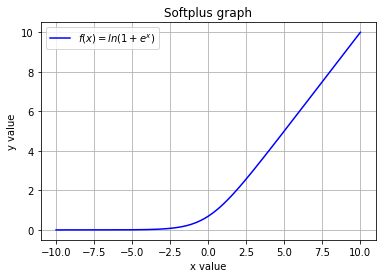

In [69]:
x = np.linspace(-10,10,800)
y = np.log(1+np.exp(x))

plt.plot(x,y,'b-',label=r'$f(x)=ln(1+e^x)$')
plt.grid(True)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('Softplus graph')
plt.legend()
plt.show()

#### 【Relu函数不足之处】：虽然Relu函数在信号响应上有很多优势，但这仅仅在正向传播方面，由于其对负值全部舍去，因此很容易使模型输出全为零而无法再进行训练。基于Relu函数产生一些变种函数：

#### ①Noisy relus：为max中的x 加了一个高斯分布的噪声，其数学形式为：$$f(x)=max(0,x+Y),Y∈N(0,\sigma(x)$$

#### ②Leaky relus: 在Relu基础上，保留一部分负值，让x为负时乘0.01，即Leaky relus中对负信号不是一味地拒绝，而是缩小，其数学形式为：$$f(x)=\{{x,(x>0)},{0.01x(otherwise)}$$在TensorFlow中，leaky relus没有专门的函数，可利用现有的函数进行组合而成：tf.maxinum(x,leak*x,name=None)  # leak 为传入的参数，可设为0.01

#### ③在Leaky relus的基础上让0.01作为参数可调，于是，当x小于0时，乘以a，a小于等于1，其数学形式为：$$f(x)=\{{x,(x>0)},{ax(otherwise)}$$ -> $$f(x)=max(x,ax)$$得到Leaky relus的公式 max(x,ax)

#### ④Elus：当x小于0时，做了更复杂的变换，见式：$$f(x)=\{{x,(x>=0)},{a(e^x-1)(otherwise)}$$a、Elus函数和Relu含函数一样都是不带参数的，且收敛速度比Relu快，b、使用Elus函数时，不使用批处理比使用批处理能够获得更好的效果，c、同时Elus函数不使用批处理的效果比Relu函数加批处理效果更好。在TensorFlow中对应的函数为：tf.nn.elu(features,name=None)

### 1.3.4 Swish函数

#### Swish函数是google公司发现的一个效果优于relu的激活函数，其数学形式为：$$f(x)=x*sigmoid(\beta x)$$其中，$\beta$为x的缩放参数，一般情况下取默认值为1即可。在使用了BN算法（啥玩意儿）的情况下，需要对x的缩放值$\beta$进行调节，TensorFlow的低版本中没有该函数，可手动封装一个：

In [72]:
def Swish(features,belta=1): 
    return features*tf.nn.sigmoid(belta*features)

### 激活函数总结：1、Tanh函数在特征差异明显时效果比较好；2、特征间的差异虽然比较复杂却没有明显区别或特征间的差异不是特别大时，需要更细微的分类判断，这时Sigmoid函数的效果会比较好；3、Relu的优势：经过其处理后的数据有更好的稀疏性，这种变换最大程度保留数据特征，用大多数元素为0的稀疏矩阵来实现